In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
# import modin.pandas as mpd
import lifelines
import math
from io import BytesIO
data_SBL = pd.read_csv("/data_1/OAI/SBL_0904.csv")
merge1 = pd.read_csv("/data_1/OAI/merge1.csv")



sbl_col_names = ['F' + str(i) for i in range(200)] + ['T' + str(i) for i in range(200)]
sbl_col_names_femur = ['F' + str(i) for i in range(200)]
sbl_col_names_tibia = ['T' + str(i) for i in range(200)]

###############
# normalize SBL
###############
sbl_values = data_SBL.loc[:, sbl_col_names].values
for row in range(sbl_values.shape[0]):
    sbl_values[row, :] = sbl_values[row, :] / sbl_values[row, :].mean()  # normalize by the averaged val. of SBL
# flip left to right so left is medial side and right is lateral side
sbl_values = np.concatenate([np.fliplr(sbl_values[:, :200]), np.fliplr(sbl_values[:, 200:])], 1) # Medial 0-200 Lateral
data_SBL.loc[:, sbl_col_names] = sbl_values

sbl_jsn_0_mean = data_SBL.loc[(merge1['V00XRJSM'] == 0) & (merge1['V00XRJSL'] == 0), sbl_col_names].values.mean(0)
#sbl_KL_0_mean = sbl.loc[cli['V00XRKL'] == 0, sbl_col_names].values.mean(0)
#sbl_pain_0_mean = sbl.loc[cli['V00WOMKP#'] == 0, sbl_col_names].values.mean(0)
baseline = sbl_jsn_0_mean

# sum of all the absolute value of sbl difference.
baseline = sbl_jsn_0_mean
sbl_difference = (data_SBL.loc[:, sbl_col_names].sub(baseline, axis=1))
sbl_difference_absolute = sbl_difference.abs().sum(1)
# print(sbl_difference_absolute)
sbl_difference_absolute.name =  'normalized_sbl'

data_SBL = pd.merge(data_SBL,sbl_difference_absolute, right_index = True,
               left_index = True)

###########  Femur 
sbl_values = data_SBL.loc[:, sbl_col_names_femur].values
for row in range(sbl_values.shape[0]):
    sbl_values[row, :] = sbl_values[row, :] / sbl_values[row, :].mean()  # normalize by the averaged val. of SBL
# flip left to right so left is medial side and right is lateral side
sbl_values = np.concatenate([np.fliplr(sbl_values[:, :200]), np.fliplr(sbl_values[:, 200:])], 1) # Medial 0-200 Lateral
data_SBL.loc[:, sbl_col_names_femur] = sbl_values

sbl_jsn_0_mean = data_SBL.loc[(merge1['V00XRJSM'] == 0) & (merge1['V00XRJSL'] == 0), sbl_col_names_femur].values.mean(0)
#sbl_KL_0_mean = sbl.loc[cli['V00XRKL'] == 0, sbl_col_names].values.mean(0)
#sbl_pain_0_mean = sbl.loc[cli['V00WOMKP#'] == 0, sbl_col_names].values.mean(0)
baseline = sbl_jsn_0_mean

# sum of all the absolute value of sbl difference.
baseline = sbl_jsn_0_mean
sbl_difference = (data_SBL.loc[:, sbl_col_names_femur].sub(baseline, axis=1))
sbl_difference_absolute = sbl_difference.abs().sum(1)
# print(sbl_difference_absolute)
sbl_difference_absolute.name =  'normalized_sbl_femur'

data_SBL = pd.merge(data_SBL,sbl_difference_absolute, right_index = True,
               left_index = True)

###########  Tibia 
sbl_values = data_SBL.loc[:, sbl_col_names_tibia].values
for row in range(sbl_values.shape[0]):
    sbl_values[row, :] = sbl_values[row, :] / sbl_values[row, :].mean()  # normalize by the averaged val. of SBL
# flip left to right so left is medial side and right is lateral side
sbl_values = np.concatenate([np.fliplr(sbl_values[:, :200]), np.fliplr(sbl_values[:, 200:])], 1) # Medial 0-200 Lateral
data_SBL.loc[:, sbl_col_names_tibia] = sbl_values

sbl_jsn_0_mean = data_SBL.loc[(merge1['V00XRJSM'] == 0) & (merge1['V00XRJSL'] == 0), sbl_col_names_tibia].values.mean(0)
#sbl_KL_0_mean = sbl.loc[cli['V00XRKL'] == 0, sbl_col_names_tibia].values.mean(0)
#sbl_pain_0_mean = sbl.loc[cli['V00WOMKP#'] == 0, sbl_col_names_tibia].values.mean(0)
baseline = sbl_jsn_0_mean

# sum of all the absolute value of sbl difference.
baseline = sbl_jsn_0_mean
sbl_difference = (data_SBL.loc[:, sbl_col_names_tibia].sub(baseline, axis=1))
sbl_difference_absolute = sbl_difference.abs().sum(1)
print(sbl_difference_absolute)
sbl_difference_absolute.name =  'normalized_sbl_tibia'




data_SBL = pd.merge(data_SBL,sbl_difference_absolute, right_index = True,
               left_index = True)


print(data_SBL)


print('total number of baseline knees',len(data_SBL))
data_SBL['id'] = data_SBL['id'].astype(str)
data_BioMarkers = pd.read_csv("/data_1/OAI/Biomarker_data.csv")
data_SBL = data_SBL.drop(["Unnamed: 0"],axis=1)
data_BioMarkers = data_BioMarkers.drop(["Unnamed: 0"],axis=1)
side_SBL_temp = data_SBL.groupby("SIDE")
side_1_SBL_Right = side_SBL_temp.get_group(1) 
side_2_SBL_Left = side_SBL_temp.get_group(2) 

print('total number of right knees',len(side_1_SBL_Right))
print('total number of left knees',len(side_2_SBL_Left))

encoding = 'utf-8'
df = pd.read_sas('/data_1/OAI/outcomes99.sas7bdat')
data_KL_grade_right = pd.read_csv('/data_1/OAI_Backup/rightFilteredklMEAS.csv')
data_BML_right = pd.read_csv('/data_1/OAI_Backup/rightFilteredbmlMoaks.csv')
data_BML_right['id'] = data_BML_right['id'].astype(str)

merge1 = merge1.dropna(axis=0, subset=['P02SEX'])
merge1 = merge1.dropna(axis=0, subset=['V00AGE'])
merge1['id'] = merge1['id'].astype(str)
merge1_temp = merge1.groupby("SIDE")
merge1_right = merge1_temp.get_group(1) 
merge1_left = merge1_temp.get_group(2) 
data_KL_grade_right = data_KL_grade_right.drop(["Unnamed: 0"],axis=1)

data_KL_grade_right = data_KL_grade_right.dropna(axis=0, subset=['V00XRKLR'])


###apply statement to make sure no columns are missed
NUM_YEARS = 11.0

data_BML_right = data_BML_right.drop(["Unnamed: 0"],axis=1)
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNFMA'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNFLA'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNFMC'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNFLC'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNFMP'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNFLP'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNSS'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNTMA'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNTLA'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNTMC'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNTLC'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNTMP'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNTLP'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNPM'])
data_BML_right = data_BML_right.dropna(axis=0, subset=['V00MBMNPL'])
# print(data_BML_right)
race_data = pd.read_csv('/data_1/OAI_Backup/MeasInventory.csv')
race_data = race_data.dropna(axis=0, subset=['P02RACE'])
race_data = race_data.drop(columns=['V00AGE'])
race_data = race_data.drop(columns=['P02SEX'])
race_data = race_data.drop(columns=['V00XRKLR'])
race_data = race_data.drop(columns=['V00XRKLL'])
race_data['id'] = race_data['id'].astype(str)


# data_BML_right = data_BML_right.dropna(axis=0, subset=['V00BNBMLSK'])

#799 bml data that is not NAN
# print(data_BML_right)
# print(data_KL_grade_right)
kmf = KaplanMeierFitter() 
#must censor data per knee
print('Before data drop mri data',len(df))
df = df.dropna(axis=0, subset=['V99RNTCNT'])
print('complete mri data',len(df))
df['id'] = df['id'].apply(lambda x: str(x,encoding))
data_KL_grade_right['id'] = data_KL_grade_right['id'].astype(str)
data_BML_right['id'] = data_BML_right['id'].astype(str)
df_8_years = df[df['V99RNTCNT'] <= NUM_YEARS].copy()
# oai_side_1_merge = pd.merge(df_8_years,side_1_SBL_Right, how = 'inner', on = ['id'])
#152 ids matching between oai and BML

oai_bml_data = pd.merge(df_8_years,side_1_SBL_Right, how = 'inner', on = ['id'])

# print(len(oai_bml_data))
# oai_bml_data = oai_bml_data.dropna(axis=0, subset=['V99RNTCNT'])
# print('after',len(oai_bml_data))

print('bml Data: ', len(data_BML_right))
print('oai Data: ', len(df_8_years))

########### MAKE SURE THIS INCLUDES ALL BML INFO

oai_bml_merge = pd.merge(df_8_years,data_BML_right, how = 'inner', on = ['id'])
print(len(oai_bml_merge))
oai_bml_SBL_KL_merge_right_pre = pd.merge(oai_bml_merge,side_1_SBL_Right, how = 'inner', on = ['id'])
print(len(oai_bml_SBL_KL_merge_right_pre))
oai_bml_SBL_KL_merge_age_pre_1 = pd.merge(oai_bml_SBL_KL_merge_right_pre,data_KL_grade_right, how = 'inner', on = ['id'])
oai_bml_SBL_KL_merge_right_1 = pd.merge(oai_bml_SBL_KL_merge_age_pre_1,race_data, how = 'inner', on = ['id'])
oai_bml_SBL_KL_merge_right = pd.merge(oai_bml_SBL_KL_merge_right_1,merge1_right, how = 'inner', on = ['id'])
# oai_bml_SBL_KL_merge = pd.merge(oai_bml_SBL_KL_merge_age_pre_2,merge1_left, how = 'inner', on = ['id'])
print(len(oai_bml_SBL_KL_merge_right))
# print(oai_bml_SBL_KL_merge.columns)

####### This is the spreadsheet to use with values for patients that oai sbl bml and KL grade data (149 patients)
# oai_bml_SBL_KL_merge = pd.merge(oai_bml_SBL_merge,data_KL_grade_right, how = 'inner', on = ['id'])
# print(oai_bml_SBL_KL_merge)
# print(oai_bml_SBL_merge)
# oai_bml_SBL_KL_merge_BML = pd.merge(df_8_years,data_BML_right, how = 'inner', on = ['id'])
# print(oai_side_1_merge_BML)
# oai_side_1_merge_KL = pd.merge(oai_side_1_merge,data_KL_grade_right, how = 'inner', on = ['id'])

# oai_side_2_merge = pd.merge(df_6_years,side_2_SBL_Left, how = 'inner', on = ['id'])
# print((oai_side_1_merge_KL))

# print(oai_bml_SBL_KL_merge[(oai_bml_SBL_KL_merge['V99RNTCNT'] ==  NUM_YEARS)])
# knee = 'right'

oai_bml_SBL_KL_merge_right.drop_duplicates(subset=['id'],inplace=True, keep='last')
oai_bml_SBL_KL_merge_right.reset_index(drop=True,inplace=True)

0       42.652465
1       26.965827
2       23.973132
3       12.275700
4       19.760343
          ...    
9429    16.192462
9430    26.847150
9431    31.128248
9432    31.426873
9433    45.088800
Length: 9434, dtype: float64
      Unnamed: 0        F0        F1        F2        F3        F4        F5  \
0              0  0.026006  0.022964  0.014936  0.000606  0.000000  0.000000   
1              1  0.017929  0.001080  0.021214  0.185721  0.275547  0.331946   
2              2  0.020951  0.037423  0.041562  0.027933  0.020951  0.020951   
3              3  0.000000  0.000000  0.005675  0.045944  0.205640  0.330851   
4              4  0.000000  0.000000  0.000000  0.000000  0.002451  0.018779   
...          ...       ...       ...       ...       ...       ...       ...   
9429        9429  0.024312  0.001902  0.004914  0.048158  0.119330  0.222531   
9430        9430  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9431        9431  0.000000  0.000000  0.000000  0.000

In [17]:
data_BML_left = pd.read_csv('/data_1/OAI_Backup/leftFilteredbmlMoaks.csv')
data_BML_left['id'] = data_BML_left['id'].astype(str)
data_BML_left = data_BML_left.drop(["Unnamed: 0"],axis=1)
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNFMA'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNFLA'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNFMC'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNFLC'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNFMP'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNFLP'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNSS'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNTMA'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNTLA'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNTMC'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNTLC'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNTMP'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNTLP'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNPM'])
data_BML_left = data_BML_left.dropna(axis=0, subset=['V00MBMNPL'])
print(data_BML_left)


data_KL_grade_left = pd.read_csv('/data_1/OAI_Backup/leftFilteredklMEAS.csv')
data_KL_grade_left = data_KL_grade_left.drop(["Unnamed: 0"],axis=1)
data_KL_grade_left = data_KL_grade_left.dropna(axis=0, subset=['V00XRKLL'])
data_KL_grade_left['id'] = data_KL_grade_left['id'].astype(str)

oai_bml_merge_left = pd.merge(df_8_years,data_BML_left, how = 'inner', on = ['id'])
print(len(oai_bml_merge))
oai_bml_SBL_KL_merge_left_pre = pd.merge(oai_bml_merge_left,side_2_SBL_Left, how = 'inner', on = ['id'])
print(len(oai_bml_SBL_KL_merge_left_pre))
oai_bml_SBL_KL_merge_age_pre_1 = pd.merge(oai_bml_SBL_KL_merge_left_pre,data_KL_grade_left, how = 'inner', on = ['id'])
oai_bml_SBL_KL_merge = pd.merge(oai_bml_SBL_KL_merge_age_pre_1,race_data, how = 'inner', on = ['id'])
oai_bml_SBL_KL_merge_left = pd.merge(oai_bml_SBL_KL_merge,merge1_left, how = 'inner', on = ['id'])
print(len(oai_bml_SBL_KL_merge_left))

oai_bml_SBL_KL_merge_left.drop_duplicates(subset=['id'],inplace=True, keep='last')
oai_bml_SBL_KL_merge_left.reset_index(drop=True,inplace=True)

           id  SIDE  V00MBMSFMA  V00MBMSFLA  V00MBMSFMC  V00MBMSFLC  \
0     9000798   2.0         2.0         2.0         3.0         0.0   
1     9001897   2.0         1.0         0.0         0.0         0.0   
2     9001897   2.0         1.0         0.0         0.0         0.0   
3     9002116   2.0         3.0         1.0         0.0         0.0   
5     9002316   2.0         0.0         0.0         0.0         0.0   
...       ...   ...         ...         ...         ...         ...   
1359  9993833   2.0         0.0         2.0         0.0         1.0   
1360  9995338   2.0         0.0         1.0         0.0         0.0   
1362  9996865   2.0         0.0         2.0         1.0         1.0   
1363  9997856   2.0         0.0         0.0         2.0         0.0   
1364  9997869   2.0         1.0         0.0         0.0         0.0   

      V00MBMSFMP  V00MBMSFLP  V00MBMSSS  V00MBMSTMA  ...  V06MBMNTLC  \
0            0.0         0.0        2.0         2.0  ...         NaN   
1  

In [18]:
##### Get rid of <=10.0 as we are already restricting dataset above
left_knee_tkr = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['V99RNTCNT'] <=  NUM_YEARS) & (oai_bml_SBL_KL_merge_left['V99ELKDAYS'].isnull() == False)]
# left_knee_tkr = oai_side_2_merge[(oai_side_2_merge['V99RNTCNT'] <=  6.0) & (oai_side_2_merge['V99ELKDAYS'].isnull() == False)]
# right_knee_censor = df[(((df['V99RNTCNT'] < 11.0) & (df['V99ERKDAYS'].isnull() == True)) | ((df['V99ERKDAYS'].isnull() == True) & (df['V99RNTCNT'] == 11.0)))]
# left_knee_censor = df[(((df['V99RNTCNT'] < 11.0) & (df['V99ELKDAYS'].isnull() == True)) | ((df['V99ELKDAYS'].isnull() == True) & (df['V99RNTCNT'] == 11.0)))]

print("total knees on left side: ", len(oai_bml_SBL_KL_merge_left))
# print("total knees on left side: ", len(oai_side_2_merge))
print("censored left knees: ", len(oai_bml_SBL_KL_merge_left) - len(left_knee_tkr))
print("proper left knee tkr: ", len(left_knee_tkr))
# print("censored left knees: ", len(oai_side_2_merge) - len(left_knee_tkr))
# print("proper left knee tkr: ", len(left_knee_tkr))

#test to see if you need == True
oai_bml_SBL_KL_merge_left['right_tkr'] = np.where(oai_bml_SBL_KL_merge_left['id'].isin(left_knee_tkr['id']) == True, 1, 0)
# oai_side_2_merge['left_tkr'] = np.where(oai_side_2_merge['id'].isin(left_knee_tkr['id']) == True, 1, 0)

#move this into upper part
column_list = ['V00MBMNFMA','V00MBMNFLA','V00MBMNFMC','V00MBMNFLC','V00MBMNFMP','V00MBMNFLP','V00MBMNSS','V00MBMNTMA','V00MBMNTLA','V00MBMNTMC','V00MBMNTMP','V00MBMNTLP','V00MBMNPM','V00MBMNPL']
oai_bml_SBL_KL_merge_left['bml_total'] = oai_bml_SBL_KL_merge_left[column_list].sum(axis=1)
print(oai_bml_SBL_KL_merge_left)
# print(oai_side_1_merge.loc[oai_side_1_merge['right_tkr'] == 0])
# print(oai_bml_SBL_KL_merge.loc[oai_bml_SBL_KL_merge['right_tkr'] == 1])
# temp = oai_bml_SBL_KL_merge.loc[oai_bml_SBL_KL_merge['right_tkr'] == 1]
# tkr_ids = temp['id'].tolist()
# print(tkr_ids)




total knees on left side:  745
censored left knees:  597
proper left knee tkr:  148
          id version  V99RNTCNT V99ERKDATE  V99ERKFLDT  V99ERKRPCF_x  \
0    9000798   b'10'       11.0        NaT         NaN           NaN   
1    9001897   b'10'       11.0        NaT         NaN           NaN   
2    9002116   b'10'       11.0        NaT         NaN           NaN   
3    9002316   b'10'       11.0        NaT         NaN           NaN   
4    9003316   b'10'       11.0        NaT         NaN           NaN   
..       ...     ...        ...        ...         ...           ...   
740  9993833   b'10'        9.0        NaT         NaN           NaN   
741  9995338   b'10'       11.0        NaT         NaN           NaN   
742  9996865   b'10'       11.0        NaT         NaN           NaN   
743  9997856   b'10'       11.0        NaT         NaN           NaN   
744  9997869   b'10'       11.0        NaT         NaN           NaN   

     V99ERKTLPR  V99ERKTPPR  V99ERKBLRP_x  V99ERKVS

In [19]:
forties = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['V00AGE'] <=  49) & (oai_bml_SBL_KL_merge_left['V00AGE'] >=  45)]
early_fifty = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['V00AGE'] <=  54) & (oai_bml_SBL_KL_merge_left['V00AGE'] >=  50)]
late_fifty = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['V00AGE'] <=  59) & (oai_bml_SBL_KL_merge_left['V00AGE'] >=  55)]
early_sixty = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['V00AGE'] <=  64) & (oai_bml_SBL_KL_merge_left['V00AGE'] >=  60)]
late_sixty = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['V00AGE'] <=  69) & (oai_bml_SBL_KL_merge_left['V00AGE'] >=  65)]
early_seventy = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['V00AGE'] <=  74) & (oai_bml_SBL_KL_merge_left['V00AGE'] >=  70)]
late_seventy = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['V00AGE'] <=  79) & (oai_bml_SBL_KL_merge_left['V00AGE'] >=  75)]

print(len(forties))
print(len(early_fifty))
print(len(late_fifty))
print(len(early_sixty))
print(len(late_sixty))
print(len(early_seventy))
print(len(late_seventy))



55
127
146
125
112
120
60


In [20]:

less_18 = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['P01BMI'] <  18.5)]
mid_20 = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['P01BMI'] <=  24.9) & (oai_bml_SBL_KL_merge_left['P01BMI'] >=  18.5)]
mid_20_to_30 = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['P01BMI'] <=  29.9) & (oai_bml_SBL_KL_merge_left['P01BMI'] >=  25.0)]
mid_30 = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['P01BMI'] <=  34.9) & (oai_bml_SBL_KL_merge_left['P01BMI'] >=  30.0)]
mid_30_to_40 = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['P01BMI'] <=  39.9) & (oai_bml_SBL_KL_merge_left['P01BMI'] >=  35.0)]
more_40 = oai_bml_SBL_KL_merge_left[(oai_bml_SBL_KL_merge_left['P01BMI'] >  40.0) ]


print(len(less_18))
print(len(mid_20))
print(len(mid_20_to_30))
print(len(mid_30))
print(len(mid_30_to_40))
print(len(more_40))



2
121
290
232
85
15


In [21]:
print(len(oai_bml_SBL_KL_merge_left))
print(len(oai_bml_SBL_KL_merge_left.loc[oai_bml_SBL_KL_merge_left['P02RACE'] == '0: Other Non-white']))
print(len(oai_bml_SBL_KL_merge_left.loc[oai_bml_SBL_KL_merge_left['P02RACE'] == '1: White or Caucasian']))
print(len(oai_bml_SBL_KL_merge_left.loc[oai_bml_SBL_KL_merge_left['P02RACE'] == '2: Black or African American']))
print(len(oai_bml_SBL_KL_merge_left.loc[oai_bml_SBL_KL_merge_left['P02RACE'] == '3: Asian']))

745
16
599
119
10


In [22]:
all_KL = oai_bml_SBL_KL_merge_left.groupby("V00XRKLL")
kl_0 = all_KL.get_group(0.0)
kl_1 = all_KL.get_group(1.0)
kl_2 = all_KL.get_group(2.0)
kl_3 = all_KL.get_group(3.0)
kl_4 = all_KL.get_group(4.0)
print(len(kl_0))
print(len(kl_1))
print(len(kl_2))
print(len(kl_3))
print(len(kl_4))


131
220
163
160
71


In [23]:
2##### Get rid of <=10.0 as we are already restricting dataset above
right_knee_tkr = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['V99RNTCNT'] <=  NUM_YEARS) & (oai_bml_SBL_KL_merge_right['V99ERKDAYS'].isnull() == False)]
# left_knee_tkr = oai_side_2_merge[(oai_side_2_merge['V99RNTCNT'] <=  6.0) & (oai_side_2_merge['V99ELKDAYS'].isnull() == False)]
# right_knee_censor = df[(((df['V99RNTCNT'] < 11.0) & (df['V99ERKDAYS'].isnull() == True)) | ((df['V99ERKDAYS'].isnull() == True) & (df['V99RNTCNT'] == 11.0)))]
# left_knee_censor = df[(((df['V99RNTCNT'] < 11.0) & (df['V99ELKDAYS'].isnull() == True)) | ((df['V99ELKDAYS'].isnull() == True) & (df['V99RNTCNT'] == 11.0)))]

print("total knees on right side: ", len(oai_bml_SBL_KL_merge_right))
# print("total knees on left side: ", len(oai_side_2_merge))
print("censored right knees: ", len(oai_bml_SBL_KL_merge_right) - len(right_knee_tkr))
print("proper right knee tkr: ", len(right_knee_tkr))
# print("censored left knees: ", len(oai_side_2_merge) - len(left_knee_tkr))
# print("proper left knee tkr: ", len(left_knee_tkr))

#test to see if you need == True
oai_bml_SBL_KL_merge_right['right_tkr'] = np.where(oai_bml_SBL_KL_merge_right['id'].isin(right_knee_tkr['id']) == True, 1, 0)
# oai_side_2_merge['left_tkr'] = np.where(oai_side_2_merge['id'].isin(left_knee_tkr['id']) == True, 1, 0)

#move this into upper part
column_list = ['V00MBMNFMA','V00MBMNFLA','V00MBMNFMC','V00MBMNFLC','V00MBMNFMP','V00MBMNFLP','V00MBMNSS','V00MBMNTMA','V00MBMNTLA','V00MBMNTMC','V00MBMNTMP','V00MBMNTLP','V00MBMNPM','V00MBMNPL']
oai_bml_SBL_KL_merge_right['bml_total'] = oai_bml_SBL_KL_merge_right[column_list].sum(axis=1)
print(oai_bml_SBL_KL_merge_right)
# print(oai_side_1_merge.loc[oai_side_1_merge['right_tkr'] == 0])
# print(oai_bml_SBL_KL_merge.loc[oai_bml_SBL_KL_merge['right_tkr'] == 1])
# temp = oai_bml_SBL_KL_merge.loc[oai_bml_SBL_KL_merge['right_tkr'] == 1]
# tkr_ids = temp['id'].tolist()
# print(tkr_ids)



total knees on right side:  878
censored right knees:  726
proper right knee tkr:  152
          id version  V99RNTCNT V99ERKDATE  V99ERKFLDT  V99ERKRPCF_x  \
0    9001400   b'10'       11.0        NaT         NaN           NaN   
1    9001695   b'10'        9.0        NaT         NaN           NaN   
2    9002430   b'10'       11.0 2010-02-15         1.0           3.0   
3    9002817   b'10'       11.0        NaT         NaN           NaN   
4    9003316   b'10'       11.0        NaT         NaN           NaN   
..       ...     ...        ...        ...         ...           ...   
873  9995338   b'10'       11.0        NaT         NaN           NaN   
874  9996098   b'10'       11.0        NaT         NaN           NaN   
875  9996865   b'10'       11.0        NaT         NaN           NaN   
876  9997381   b'10'       11.0        NaT         NaN           NaN   
877  9999510   b'10'       11.0        NaT         NaN           NaN   

     V99ERKTLPR  V99ERKTPPR  V99ERKBLRP_x  V99ER

In [24]:
forties = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['V00AGE'] <=  49) & (oai_bml_SBL_KL_merge_right['V00AGE'] >=  45)]
early_fifty = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['V00AGE'] <=  54) & (oai_bml_SBL_KL_merge_right['V00AGE'] >=  50)]
late_fifty = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['V00AGE'] <=  59) & (oai_bml_SBL_KL_merge_right['V00AGE'] >=  55)]
early_sixty = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['V00AGE'] <=  64) & (oai_bml_SBL_KL_merge_right['V00AGE'] >=  60)]
late_sixty = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['V00AGE'] <=  69) & (oai_bml_SBL_KL_merge_right['V00AGE'] >=  65)]
early_seventy = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['V00AGE'] <=  74) & (oai_bml_SBL_KL_merge_right['V00AGE'] >=  70)]
late_seventy = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['V00AGE'] <=  79) & (oai_bml_SBL_KL_merge_right['V00AGE'] >=  75)]

print(len(forties))
print(len(early_fifty))
print(len(late_fifty))
print(len(early_sixty))
print(len(late_sixty))
print(len(early_seventy))
print(len(late_seventy))


79
151
147
156
144
130
71


In [25]:

less_18 = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['P01BMI'] <  18.5)]
mid_20 = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['P01BMI'] <=  24.9) & (oai_bml_SBL_KL_merge_right['P01BMI'] >=  18.5)]
mid_20_to_30 = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['P01BMI'] <=  29.9) & (oai_bml_SBL_KL_merge_right['P01BMI'] >=  25.0)]
mid_30 = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['P01BMI'] <=  34.9) & (oai_bml_SBL_KL_merge_right['P01BMI'] >=  30.0)]
mid_30_to_40 = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['P01BMI'] <=  39.9) & (oai_bml_SBL_KL_merge_right['P01BMI'] >=  35.0)]
more_40 = oai_bml_SBL_KL_merge_right[(oai_bml_SBL_KL_merge_right['P01BMI'] >  40.0) ]


print(len(less_18))
print(len(mid_20))
print(len(mid_20_to_30))
print(len(mid_30))
print(len(mid_30_to_40))
print(len(more_40))



0
164
333
269
91
19


In [26]:
print(len(oai_bml_SBL_KL_merge_right))
print(len(oai_bml_SBL_KL_merge_right.loc[oai_bml_SBL_KL_merge_right['P02RACE'] == '0: Other Non-white']))
print(len(oai_bml_SBL_KL_merge_right.loc[oai_bml_SBL_KL_merge_right['P02RACE'] == '1: White or Caucasian']))
print(len(oai_bml_SBL_KL_merge_right.loc[oai_bml_SBL_KL_merge_right['P02RACE'] == '2: Black or African American']))
print(len(oai_bml_SBL_KL_merge_right.loc[oai_bml_SBL_KL_merge_right['P02RACE'] == '3: Asian']))

878
15
720
135
8


In [27]:
all_KL = oai_bml_SBL_KL_merge_right.groupby("V00XRKLR")
kl_0 = all_KL.get_group(0.0)
kl_1 = all_KL.get_group(1.0)
kl_2 = all_KL.get_group(2.0)
kl_3 = all_KL.get_group(3.0)
kl_4 = all_KL.get_group(4.0)
print(len(kl_0))
print(len(kl_1))
print(len(kl_2))
print(len(kl_3))
print(len(kl_4))


154
246
217
175
86


          id version    time  V99RNTCNT V99ERKDATE  V99ERKFLDT  V99ERKRPCF_x  \
0    9001400   b'10'  3240.0       11.0        NaT         NaN           NaN   
1    9001695   b'10'  2520.0        9.0        NaT         NaN           NaN   
2    9002430   b'10'  1702.0       11.0 2010-02-15         1.0           3.0   
3    9002817   b'10'  3240.0       11.0        NaT         NaN           NaN   
4    9003316   b'10'  3240.0       11.0        NaT         NaN           NaN   
..       ...     ...     ...        ...        ...         ...           ...   
873  9995338   b'10'  3240.0       11.0        NaT         NaN           NaN   
874  9996098   b'10'  3240.0       11.0        NaT         NaN           NaN   
875  9996865   b'10'  3240.0       11.0        NaT         NaN           NaN   
876  9997381   b'10'  3240.0       11.0        NaT         NaN           NaN   
877  9999510   b'10'  3240.0       11.0        NaT         NaN           NaN   

     V99ERKTLPR  V99ERKTPPR  V99ERKBLRP

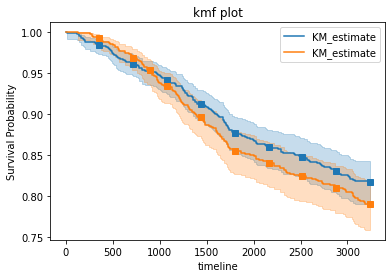

In [28]:
from time_adder import add_time

oai_SBL_KL_BML_right = add_time(oai_bml_SBL_KL_merge_right, 'right')

oai_SBL_KL_BML_left = add_time(oai_bml_SBL_KL_merge_left, 'left')

In [29]:



oai_right_temp_SBL_Merged_males_right =  oai_SBL_KL_BML_right[["time","right_tkr",'normalized_sbl']]
print(len(oai_right_temp_SBL_Merged_males_right))
oai_right_temp_BML_Merged_males_right = oai_SBL_KL_BML_right[["time","right_tkr",'bml_total']]
oai_right_temp_SBL_Femur_males_right =  oai_SBL_KL_BML_right[["time","right_tkr",'normalized_sbl_femur']]
oai_right_temp_SBL_Tibia_males_right =  oai_SBL_KL_BML_right[["time","right_tkr",'normalized_sbl_tibia']]


oai_right_temp_SBL_Merged_males_left =  oai_SBL_KL_BML_left[["time","right_tkr",'normalized_sbl']]
oai_right_temp_BML_Merged_males_left = oai_SBL_KL_BML_left[["time","right_tkr",'bml_total']]
oai_right_temp_SBL_Femur_males_left =  oai_SBL_KL_BML_left[["time","right_tkr",'normalized_sbl_femur']]
oai_right_temp_SBL_Tibia_males_left =  oai_SBL_KL_BML_left[["time","right_tkr",'normalized_sbl_tibia']]
print(len(oai_right_temp_SBL_Merged_males_left))

oai_right_temp_SBL_Merged_males_all = pd.concat([oai_right_temp_SBL_Merged_males_right,oai_right_temp_SBL_Merged_males_left], ignore_index=True)

print(len(oai_SBL_KL_BML_right.loc[oai_SBL_KL_BML_right['bml_total'] >= 1]))
print(len(oai_SBL_KL_BML_left.loc[oai_SBL_KL_BML_left['bml_total'] >= 1]))
oai_right_temp_SBL_Femur_males_all = pd.concat([oai_right_temp_SBL_Femur_males_right,oai_right_temp_SBL_Femur_males_left], ignore_index=True)
oai_right_temp_SBL_Tibia_males_all = pd.concat([oai_right_temp_SBL_Tibia_males_right,oai_right_temp_SBL_Tibia_males_left], ignore_index=True)
oai_right_temp_SBL_BML_males_all = pd.concat([oai_right_temp_BML_Merged_males_right,oai_right_temp_BML_Merged_males_left], ignore_index=True)
# print(oai_right_temp_SBL_Merged_males_all)
# print(len(oai_right_temp_SBL_Merged_males_all))
# print(len(oai_right_temp_SBL_BML_males_all.loc[oai_right_temp_SBL_BML_males_all['right_tkr'] == 1]))

list_bad = ['right_tkr', 'time']

brier_list = []


878
745
737
623


bad cols:  []
penalizer_val:  0.01
Iteration 1: norm_delta = 1.08410, step_size = 0.9000, log_lik = -1465.38563, newton_decrement = 97.92033, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.36547, step_size = 0.9000, log_lik = -1488.96382, newton_decrement = 81.92684, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.08185, step_size = 0.9000, log_lik = -1407.15204, newton_decrement = 2.88698, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.01166, step_size = 1.0000, log_lik = -1404.04857, newton_decrement = 0.04584, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.00022, step_size = 1.0000, log_lik = -1404.00218, newton_decrement = 0.00002, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, log_lik = -1404.00216, newton_decrement = 0.00000, seconds_since_start = 0.1
Convergence success after 6 iterations.
Concordance:  0.719921454908588


model,lifelines.CoxPHFitter
duration col,'time'
event col,'right_tkr'
penalizer,0.01
l1 ratio,0
robust variance,True
baseline estimation,breslow
number of observations,1136
number of events observed,213
partial log-likelihood,-1404.002
time fit was run,2022-06-27 22:22:07 UTC


Bad SBL Columns:  [0.20014717771228258]
Mean Brier Score :  []


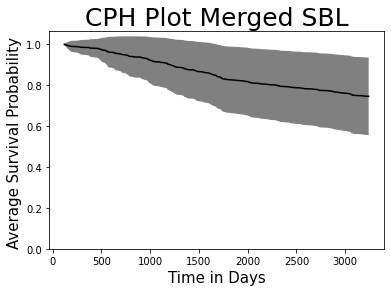

In [30]:
from all_knee_sbl import cph_creator_SBL

brier_score,bad_cols = cph_creator_SBL(oai_right_temp_SBL_Merged_males_all, 'CPH Plot Merged SBL')
# mean_score = net_benefit(oai_right_temp_kl_BML_totals_Merged_female,0.1,0.002)
# print('Mean Net benefit: ' , mean_score)
print('Bad SBL Columns: ', bad_cols)
print('Mean Brier Score : ', brier_score)
brier_list.append(bad_cols[0])

bad cols:  []
penalizer_val:  0.01
Iteration 1: norm_delta = 0.80108, step_size = 0.9000, log_lik = -1465.38563, newton_decrement = 60.91005, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.13658, step_size = 0.9000, log_lik = -1421.18985, newton_decrement = 3.89107, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.02375, step_size = 0.9000, log_lik = -1417.21286, newton_decrement = 0.10376, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00031, step_size = 1.0000, log_lik = -1417.10823, newton_decrement = 0.00002, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, log_lik = -1417.10821, newton_decrement = 0.00000, seconds_since_start = 0.1
Convergence success after 5 iterations.
Concordance:  0.6778979105853433


model,lifelines.CoxPHFitter
duration col,'time'
event col,'right_tkr'
penalizer,0.01
l1 ratio,0
robust variance,True
baseline estimation,breslow
number of observations,1136
number of events observed,213
partial log-likelihood,-1417.108
time fit was run,2022-06-27 22:22:09 UTC


Bad SBL Columns:  [0.20497098354901647]
Mean Brier Score :  []


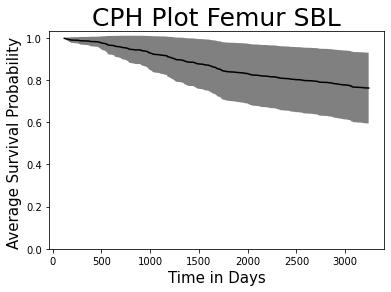

In [31]:
from all_knee_sbl import cph_creator_SBL

brier_score,bad_cols = cph_creator_SBL(oai_right_temp_SBL_Femur_males_all, 'CPH Plot Femur SBL')
# mean_score = net_benefit(oai_right_temp_kl_BML_totals_Merged_female,0.1,0.002)
# print('Mean Net benefit: ' , mean_score)
print('Bad SBL Columns: ', bad_cols)
print('Mean Brier Score : ', brier_score)
brier_list.append(bad_cols[0])

bad cols:  []


/home/tsurendr/venv/oai/lib/python3.6/site-packages/lifelines/fitters/coxph_fitter.py:1602: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  "Newton-Rhaphson failed to converge sufficiently. {0}".format(CONVERGENCE_DOCS), exceptions.ConvergenceWarning


penalizer_val:  0.1
Iteration 1: norm_delta = 0.66099, step_size = 0.9000, log_lik = -1465.38563, newton_decrement = 54.71019, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.14902, step_size = 0.9000, log_lik = -1469.26032, newton_decrement = 30.91818, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.07926, step_size = 0.9000, log_lik = -1434.93111, newton_decrement = 4.93390, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.02162, step_size = 1.0000, log_lik = -1429.38757, newton_decrement = 0.24242, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.00133, step_size = 1.0000, log_lik = -1429.13617, newton_decrement = 0.00082, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, log_lik = -1429.13534, newton_decrement = 0.00000, seconds_since_start = 0.1
Convergence success after 6 iterations.
Concordance:  0.70980085266554


model,lifelines.CoxPHFitter
duration col,'time'
event col,'right_tkr'
penalizer,0.1
l1 ratio,0
robust variance,True
baseline estimation,breslow
number of observations,1136
number of events observed,213
partial log-likelihood,-1429.135
time fit was run,2022-06-27 22:22:11 UTC


Bad SBL Columns:  [0.20845200021804436]
Mean Brier Score BML female:  []


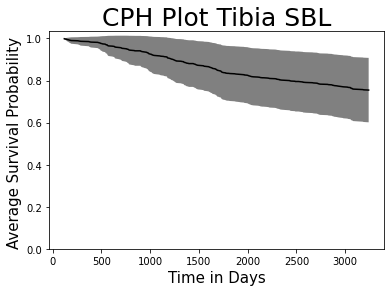

In [32]:
from all_knee_sbl import cph_creator_SBL

brier_score,bad_cols = cph_creator_SBL(oai_right_temp_SBL_Tibia_males_all, 'CPH Plot Tibia SBL')
# mean_score = net_benefit(oai_right_temp_kl_BML_totals_Merged_female,0.1,0.002)
# print('Mean Net benefit: ' , mean_score)
print('Bad SBL Columns: ', bad_cols)
print('Mean Brier Score BML female: ', brier_score)
brier_list.append(bad_cols[0])

bad cols:  []
penalizer_val:  0.01
Iteration 1: norm_delta = 0.87460, step_size = 0.9000, log_lik = -1465.38563, newton_decrement = 75.53786, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.14209, step_size = 0.9000, log_lik = -1409.54052, newton_decrement = 4.31815, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.02499, step_size = 0.9000, log_lik = -1405.12244, newton_decrement = 0.11759, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00032, step_size = 1.0000, log_lik = -1405.00387, newton_decrement = 0.00002, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, log_lik = -1405.00385, newton_decrement = 0.00000, seconds_since_start = 0.1
Convergence success after 5 iterations.
Concordance:  0.7380886080811184


model,lifelines.CoxPHFitter
duration col,'time'
event col,'right_tkr'
penalizer,0.01
l1 ratio,0
robust variance,True
baseline estimation,breslow
number of observations,1136
number of events observed,213
partial log-likelihood,-1405.004
time fit was run,2022-06-27 22:22:13 UTC


Bad SBL Columns:  [0.19515265371478402]
Mean Brier Score BML female:  []


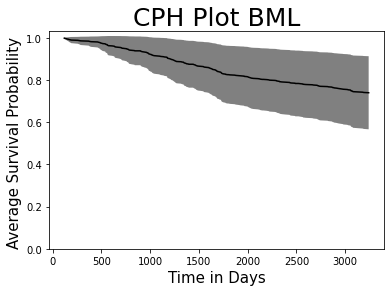

In [33]:
from all_knee_sbl import cph_creator_SBL

brier_score,bad_cols = cph_creator_SBL(oai_right_temp_SBL_BML_males_all, 'CPH Plot BML')
# mean_score = net_benefit(oai_right_temp_kl_BML_totals_Merged_female,0.1,0.002)
# print('Mean Net benefit: ' , mean_score)
print('Bad SBL Columns: ', bad_cols)
print('Mean Brier Score BML female: ', brier_score)
brier_list.append(bad_cols[0])

In [34]:
merge_val = brier_list[0]
femur_val = brier_list[1]
tibia_val = brier_list[2]
bml_val = brier_list[3]
print(brier_list)
merged_skill_score = 1 - (merge_val/bml_val)
femur_skill_score = 1 - (femur_val/bml_val)
tibia_skill_score = 1 - (tibia_val/bml_val)
# BML_skill_score = 1 - brier_list[0]/brier_list[3]

print('merged skill score',merged_skill_score)
print('femur skill score',femur_skill_score)
print('tibia skill score',tibia_skill_score)

[0.20014717771228258, 0.20497098354901647, 0.20845200021804436, 0.19515265371478402]
merged skill score -0.02559290843566009
femur skill score -0.050311023946320255
tibia skill score -0.06814842765447282
